**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: JULIO CESAR MESTAS DELGADO
*   MATRÍCULA: A01794827


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [4]:
import pandas as pd
air_df = pd.read_csv('/content/drive/MyDrive/Documentos/Tec de Monterrey/MNA/Ciencia y analitica de datos/Semana 2/LaqnData.csv')

In [54]:
air_df.shape

(43800, 6)

In [55]:
air_df.loc[0].index

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [ ]:
air_df.head()

In [ ]:
air_df.tail()

In [56]:
type(adult_df.Site)

pandas.core.series.Series

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [5]:
registros_unicos = air_df.nunique()
print("Número de registros únicos :", registros_unicos)

Número de registros únicos : Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64


In [6]:
num_Species = air_df['Species'].nunique()
print("Número de registros únicos en Species:", num_Species)

Número de registros únicos en Species: 5


In [7]:
air_df.drop("Provisional or Ratified", axis=1, inplace=True)
registros_unicos = air_df.nunique()
print("Número de registros únicos :", registros_unicos)

Número de registros únicos : Site                  1
Species               5
ReadingDateTime    8760
Value              1847
Units                 3
dtype: int64


In [8]:
valores_unicos = air_df['Units'].unique()
if len(valores_unicos) == 1:
    air_df.drop("Units", axis=1, inplace=True)

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [9]:
conteo_por_categoria = air_df['Species'].value_counts()
print(conteo_por_categoria)

NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64


In [10]:
total_mediciones = conteo_por_categoria.sum()
print("Total de mediciones:", total_mediciones)

Total de mediciones: 43800


In [11]:
lecturas_contaminantes =air_df.shape[0]

if total_mediciones == lecturas_contaminantes:
    print("Las lecturas de cada contaminante coinciden con el total de mediciones.")
else:
    print("Las lecturas de cada contaminante no coinciden con el total de mediciones.")

Las lecturas de cada contaminante coinciden con el total de mediciones.


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [12]:
promedio_por_contaminante = air_df.groupby("Species")["Value"].mean()
print("El promedio del contaminante =" ,promedio_por_contaminante)

El promedio del contaminante = Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [13]:
# Utiliza pivot para cambiar al formato ancho
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')


In [14]:
# Mostrar el DataFrame resultante
print(pvt_df)

Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN
...               ...   ...   ...   ...    ...
31/12/2017 19:00  0.7  17.5  18.5  16.3   -2.0
31/12/2017 20:00  0.7  17.5  18.6  14.5    6.0
31/12/2017 21:00  0.7  14.1  15.1   8.6    5.0
31/12/2017 22:00  1.1  22.0  23.6  12.5    5.0
31/12/2017 23:00  0.9  19.4  20.7  10.4    6.0

[8760 rows x 5 columns]


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [15]:
desc_NO2 = pvt_df['NO2'].describe()
print(desc_NO2)

count    8660.000000
mean       38.010185
std        18.580841
min         2.800000
25%        23.800000
50%        35.300000
75%        49.900000
max       120.200000
Name: NO2, dtype: float64


In [16]:
fecha_max_NO2 = pvt_df['NO2'].idxmax()
print(fecha_max_NO2 )

print("El mayor valor de NO2 registrado es", desc_NO2['max'], "y pertenece al día", fecha_max_NO2)

24/01/2017 19:00
El mayor valor de NO2 registrado es 120.2 y pertenece al día 24/01/2017 19:00


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

In [17]:
import numpy as np
import matplotlib.pyplot as plt

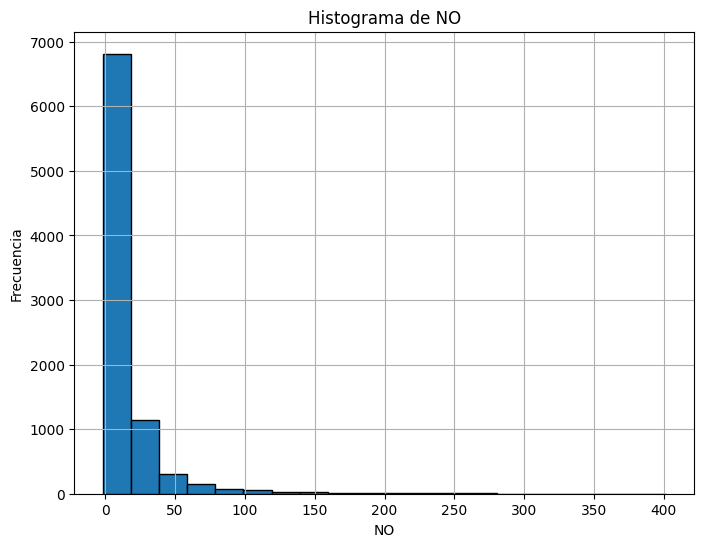

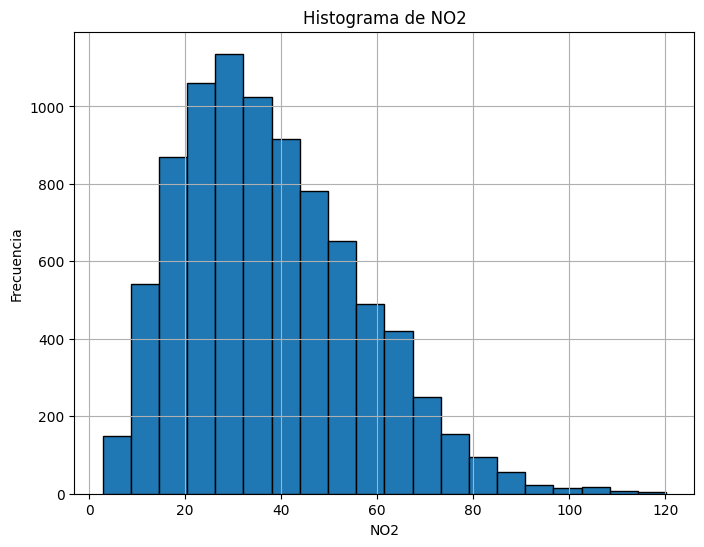

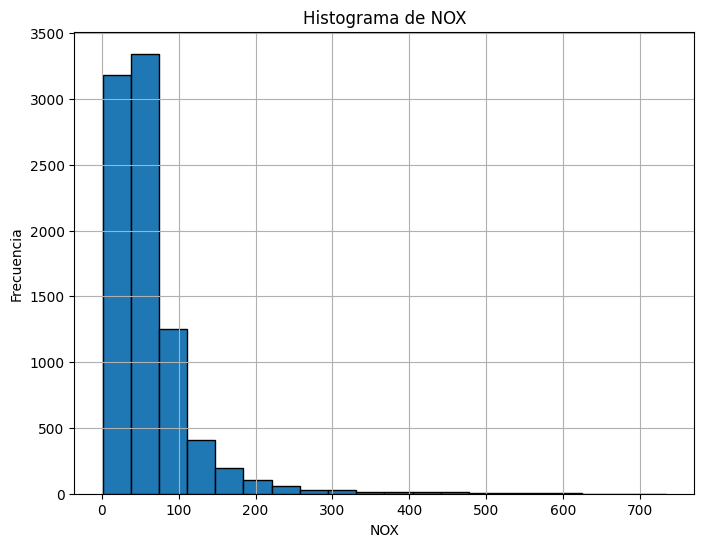

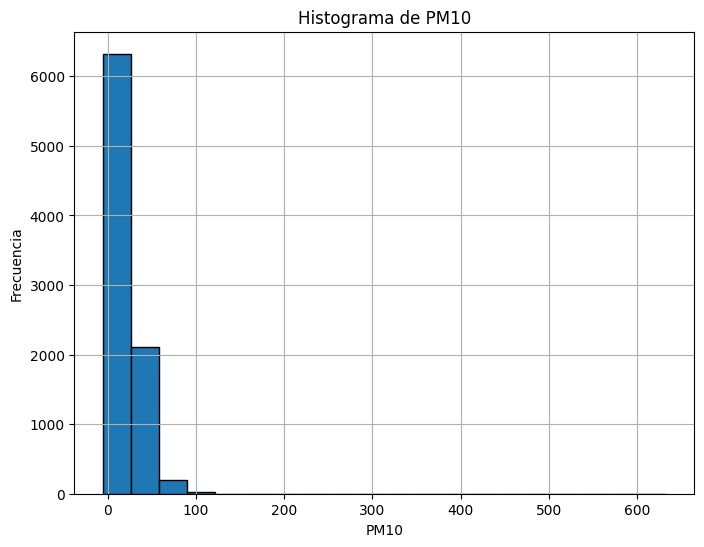

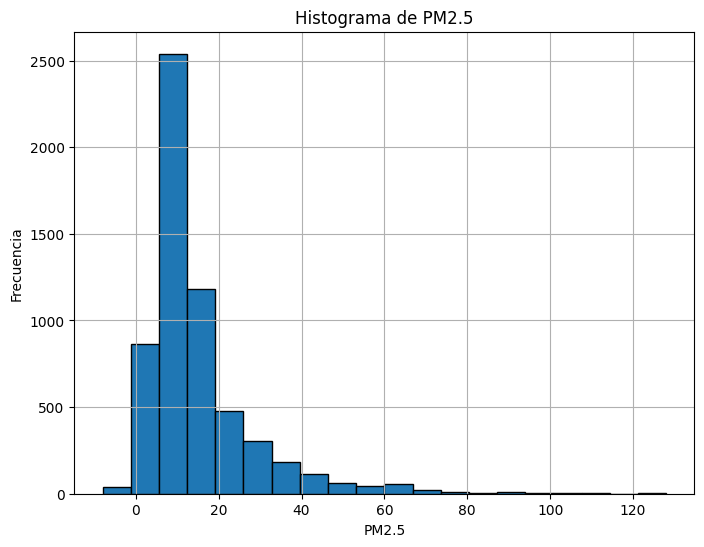

In [18]:
for columna in pvt_df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(pvt_df[columna].dropna(), bins=20, edgecolor='k')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [19]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Site  Value   Units
Month Day Time  Species                    
01    01  00:00 NO       CT3    3.5  ug m-3
          01:00 NO       CT3    3.6  ug m-3
          02:00 NO       CT3    2.2  ug m-3
          03:00 NO       CT3    2.1  ug m-3
          04:00 NO       CT3    3.3  ug m-3
...                      ...    ...     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3
          20:00 PM2.5    CT3    6.0  ug m-3
          21:00 PM2.5    CT3    5.0  ug m-3
          22:00 PM2.5    CT3    5.0  ug m-3
          23:00 PM2.5    CT3    6.0  ug m-3

[43800 rows x 3 columns]

**Esto divide la columna "ReadingDateTime" en dos nuevas columnas, "Date" y "Time", utilizando el espacio como separador.**

    datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True)
    datetime_df.columns = ['Date', 'Time']
------------------------------------------------------------------------------

**Esto divide la columna "Date" en tres nuevas columnas, "Day", "Month", y "Year", utilizando "/" como separador.**
    date_df = datetime_df.Date.str.split('/', expand=True)
    date_df.columns = ['Day', 'Month', 'Year']
-----------------------------------------------------------------------------

**Aquí, las nuevas columnas "Day", "Month", y "Time" se unen al DataFrame original "air_df". Luego, la columna "ReadingDateTime" y la columna "Year" se eliminan del DataFrame resultante.**
    air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])
-----------------------------------------------------------------------------

**Finalmente, se configura un índice múltiple utilizando las columnas "Month", "Day", "Time", y "Species".**
    air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species'])
-----------------------------------------------------------------------------


9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [20]:
air_df.unstack()

Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        
Species              NO     NO2            NOX   PM10   PM2.5  
Month Day Time                                                 
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
...                 ...     ...            ...    ...     ...  
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3  

[8760 rows x 15 columns]

**No son iguales**, en el primer frame (Paso 8), el Dato "Species", "Site" y "Values" estpán como columna y sus valores como registros.

En el (Paso 9), el frame está transformado donde el Dato "Species" esta como dimensión y sus valores son columnas del frame, en la matriz se desglosan los valores de Site y Value para cada valor de "Species2

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

**melt() / pivot():**
   
Diferencias

1.   melt() Utilizado para convertir un DataFrame ancho en uno largo
2.   pivot() Utilizado para convertir un DataFrame largo en uno ancho.

Similutudes

1.   Son métodos son utilizados para reorganizar la estructura de datos de un DataFrame.
2.   Trabajan con una matriz de 2 dimensiones, (columnas y registros)

**stack() / unstack():**

Diferencias

1.   stack() Utilizado para pivotar (rotar) columnas en niveles de índice.
2.  unstack() Utilizado para deshacer la operación realizada por stack() y volver a una estructura de datos más ancha.

Similitudes

1.   Trabajan con frames multidimensionales
2.   Puedes agrupar o desagrupar datos.

**Elección**
La elección depende de la estructura inicial de los datos y del formato deseado para el análisis posterior. En muchos casos, se pueden utilizar en combinación para lograr la transformación de datos deseada.










